In [1]:
from sklearn import datasets
import numpy as np 
import matplotlib.pyplot as plt

iris = datasets.load_iris()

In [2]:
%matplotlib inline
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [3]:
from scipy import stats


def GMMs(X, k=3, steps=10):
    
    def p(x, mu, sigma):
        n = len(x)
        div = (2 * np.pi) ** (n / 2) * (abs(np.linalg.det(sigma)) ** 0.5)
        expOn = -0.5 * ( np.dot( (x - mu).T,  np.dot(np.linalg.inv(sigma), (x - mu)) ) )      
        return np.exp(expOn) / div
        
    def init(X):
        _, n = X.shape
        return np.random.rand(k, n), 2 * np.random.rand(k, n, n) + 1, np.random.rand(k)
    
    # k个Gausssian distribution
    mus, sigmas, alphas = init(X)
    # EM algorithm
    # E-step
    mat = np.zeros((len(X), k))
    for times in range(steps):
        for j, x in enumerate(X):
            temp, tempP = 0, 0
            for i in range(k):
                tempP = p(x, mus[i], sigmas[i])
                temp += tempP
                mat[j][i] = alphas[i] * tempP
            mat[j] /= temp
        
        for i in range(k):
            # updata mus
            mus[i] = np.dot(mat[:, i].T, X) / sum(mat[:, i])
            
            # update sigmas
            temp = np.zeros(sigmas[0].shape)
            for j in range(len(X)):
                data = (X[j] - mus[i]).reshape(4, 1)
                temp += mat[j][i] * np.dot(data, data.T)
            temp /= sum(mat[:, i])
            sigmas[i] = temp
            alphas[i] = sum(mat[:, i]) / len(X)
    # clustering
    Ans = np.zeros(len(X))
    for j, x in enumerate(X):
        temp, tempP = 0, 0
        for i in range(k):
            tempP = p(x, mus[i], sigmas[i])
            temp += tempP
            mat[j][i] = alphas[i] * tempP
        mat[j] /= temp
        Ans[j] = np.argmax(mat[j])
    return Ans

In [11]:
test_y = GMMs(iris.data, steps=20)
test_y

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

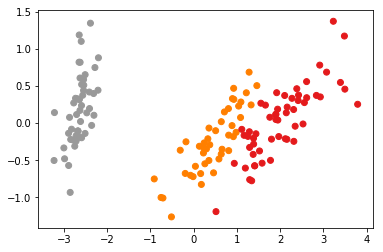

In [12]:
from sklearn.decomposition import PCA

X_reduced = PCA(n_components=2).fit_transform(iris.data)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=test_y, cmap=plt.cm.Set1)

In [15]:
def evaluate(y, t):
    a, b, c, d = [0 for i in range(4)]
    for i in range(len(y)):
        for j in range(i+1, len(y)):
            if y[i] == y[j] and t[i] == t[j]:
                a += 1
            elif y[i] == y[j] and t[i] != t[j]:
                b += 1
            elif y[i] != y[j] and t[i] == t[j]:
                c += 1
            elif y[i] != y[j] and t[i] != t[j]:
                d += 1
    return a, b, c, d

def external_index(a, b, c, d, m):
    JC = a / (a + b + c)
    FMI = np.sqrt(a**2 / ((a + b) * (a + c)))
    RI = 2 * ( a + d ) / ( m * (m + 1) )
    return JC, FMI, RI

def evaluate_it(y, t):
    a, b, c, d = evaluate(y, t)
    return external_index(a, b, c, d, len(y))

In [16]:
evaluate_it(iris.target, test_y)

(0.8789808917197452, 0.9355985958131776, 0.9448123620309051)